#🪶 Birds Species - Image Classification

## 1. Problem

To identify the species to which a bird belongs to among the 400 different species that our model was trained on and classify it accordingly.

## 2. Data
Data set of `400` bird species.`58388` training images, `2000` test images(5 images per species) and `2000` validation images(5 images per species.
All images are `224 X 224 X 3` color images in jpg format.

Data : https://www.kaggle.com/gpiosenka/100-bird-species?select=EfficientNetB4-BIRDS-0.99.h5

## 3. Model Selection
efficientnet/b4/classification
Imagenet (ILSVRC-2012-CLS) classification with EfficientNet-B4.

model_url: https://tfhub.dev/tensorflow/efficientnet/b4/classification/1

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip "/content/drive/MyDrive/archive.zip" -d "/content/drive/MyDrive/Birds Data"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("GPU", "Available" if tf.config.list_physical_devices("GPU") else "Not Available")

GPU Not Available


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

##Getting our data ready

In [ ]:
birds_data = pd.read_csv("/content/drive/MyDrive/Birds Data/birds.csv")
birds_data.head()

class index                      filepaths           labels data set
0            0  train/ABBOTTS BABBLER/001.jpg  ABBOTTS BABBLER    train
1            0  train/ABBOTTS BABBLER/002.jpg  ABBOTTS BABBLER    train
2            0  train/ABBOTTS BABBLER/003.jpg  ABBOTTS BABBLER    train
3            0  train/ABBOTTS BABBLER/004.jpg  ABBOTTS BABBLER    train
4            0  train/ABBOTTS BABBLER/005.jpg  ABBOTTS BABBLER    train

In [ ]:
#Checking the total number of samples we have
len(birds_data)

62388

In [ ]:
#Unique Species of birds
birds_species = np.unique(birds_data.labels)
len(birds_species)

401

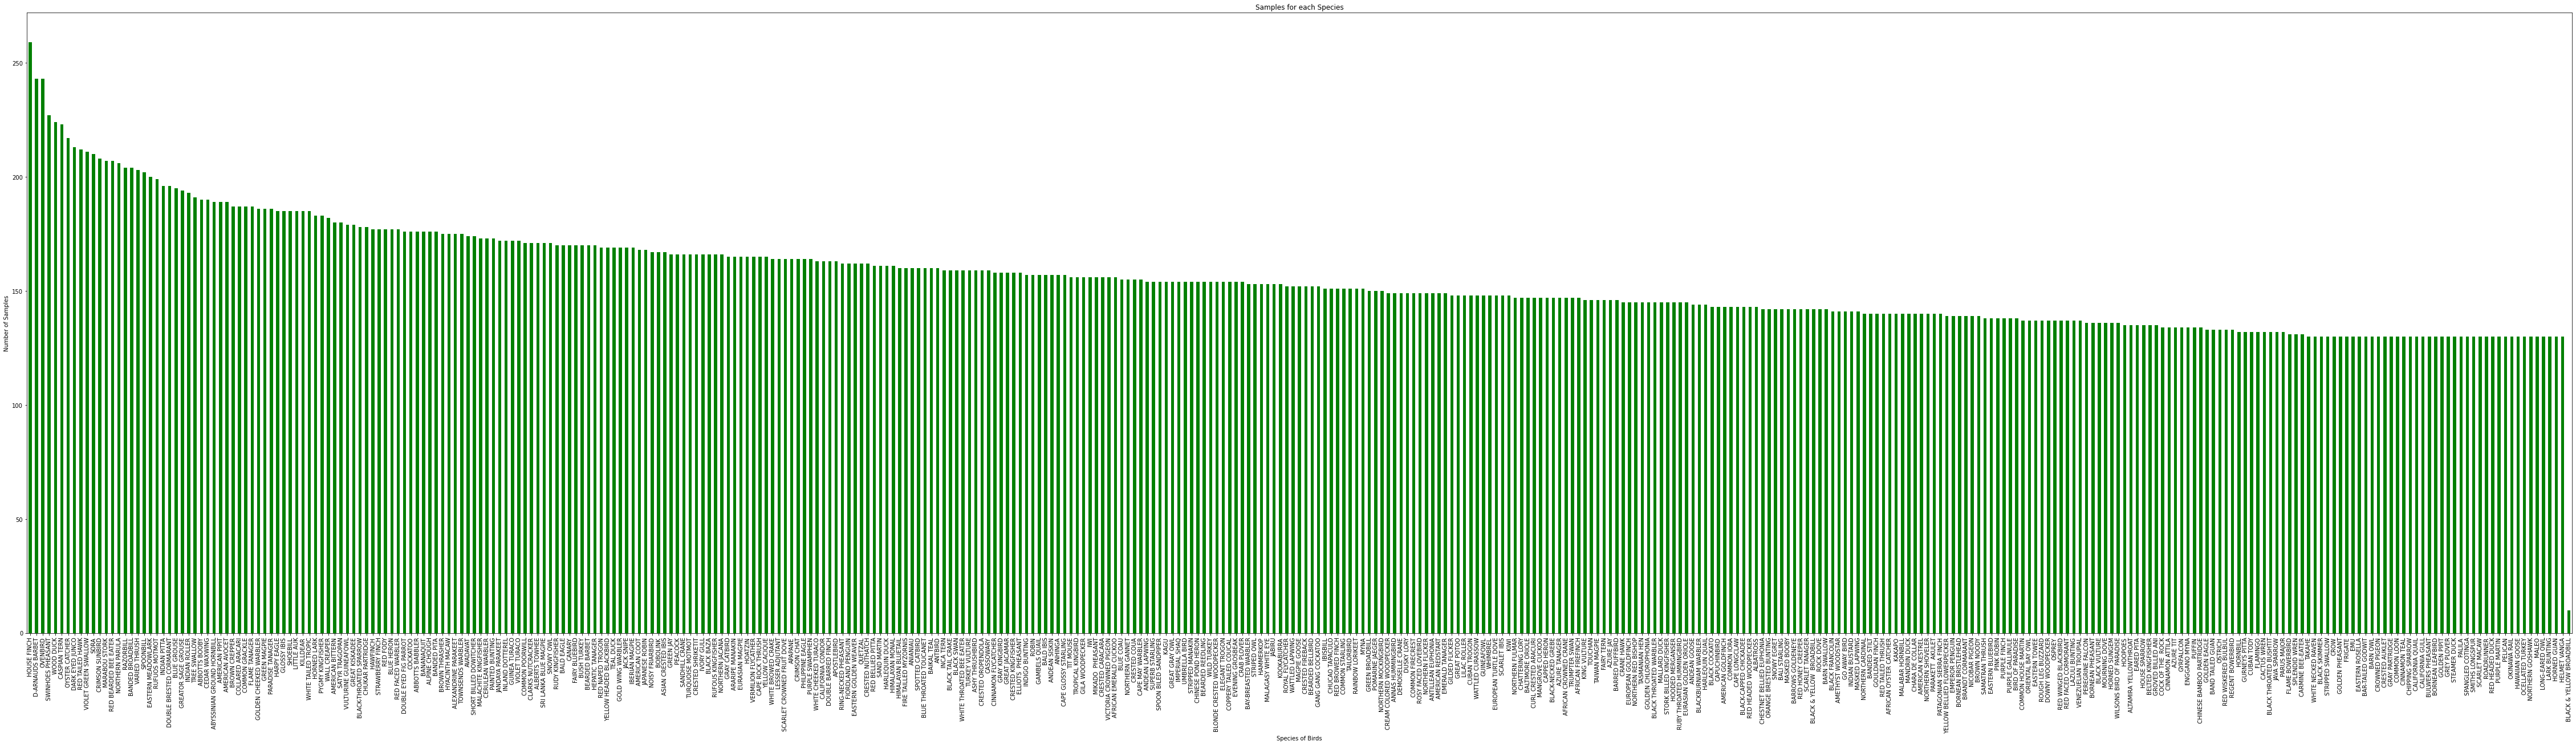

In [ ]:
plt.figure(figsize=(80,20))
plt.xlabel("Species of Birds")
plt.ylabel("Number of Samples")
plt.title("Samples for each Species")
birds_data.labels.value_counts().plot(kind="bar", color="green")

In [ ]:
birds_latin_names = pd.read_csv("/content/drive/MyDrive/Birds Data/birds latin names.csv")
birds_latin_names.head()

class_index                       class       SCIENTIFIC NAME
0            0             ABBOTTS BABBLER  Malacocincla abbotti
1            1               ABBOTTS BOOBY      Papasula abbotti
2            2  ABYSSINIAN GROUND HORNBILL  Bucorvus abyssinicus
3            3       AFRICAN CROWNED CRANE   Balearica regulorum
4            4      AFRICAN EMERALD CUCKOO  Chrysococcyx cupreus

In [ ]:
print(f"we have {birds_latin_names.class_index.max() + 1} unique species.")

we have 400 unique species.


In [ ]:
#Creating Boolean Labels
boolean_labels = []
for i in range(len(birds_data)):
  boolean_labels.append(birds_data.labels[i] == birds_species)

labels = birds_data.labels

print(len(boolean_labels))
print(len(birds_data))
print(boolean_labels[:1])

62388
62388
[array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       

In [ ]:
birds_species[boolean_labels[1].argmax()]

'ABBOTTS BABBLER'

In [ ]:
#Creating File Paths
filepaths = []

for i in range(len(birds_data)):
  filepath = "/content/drive/MyDrive/Birds Data/" + str(birds_data.filepaths[i])
  filepaths.append(filepath)

filepaths[:10]

['/content/drive/MyDrive/Birds Data/train/ABBOTTS BABBLER/001.jpg',
 '/content/drive/MyDrive/Birds Data/train/ABBOTTS BABBLER/002.jpg',
 '/content/drive/MyDrive/Birds Data/train/ABBOTTS BABBLER/003.jpg',
 '/content/drive/MyDrive/Birds Data/train/ABBOTTS BABBLER/004.jpg',
 '/content/drive/MyDrive/Birds Data/train/ABBOTTS BABBLER/005.jpg',
 '/content/drive/MyDrive/Birds Data/train/ABBOTTS BABBLER/006.jpg',
 '/content/drive/MyDrive/Birds Data/train/ABBOTTS BABBLER/007.jpg',
 '/content/drive/MyDrive/Birds Data/train/ABBOTTS BABBLER/008.jpg',
 '/content/drive/MyDrive/Birds Data/train/ABBOTTS BABBLER/009.jpg',
 '/content/drive/MyDrive/Birds Data/train/ABBOTTS BABBLER/010.jpg']

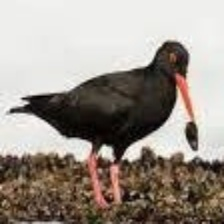

In [ ]:
from IPython.display import Image
Image(filepaths[1000])

In [ ]:
len(filepaths), len(boolean_labels)

(62388, 62388)

##Visualizing our data

In [ ]:
#plot images
def plot_image(filepaths, start=0, end=12):
  """
  This function plots the images from a list of given filepaths.

  filepaths: List of the paths where the image is stored
  start: Starting index to plot the image from.
  end: Last index to plot the image to.
  """
  plt.figure(figsize=(20,30))
  rows = (end - start)//2
  cols = (end-start) - ((end - start)//2)

  for i in range(start, start + (end - start)):
    ax = plt.subplot(rows, cols, i+1-start)
    image = plt.imread(filepaths[i])
    plt.imshow(image)
    plt.title(birds_species[boolean_labels[i].argmax()])
    plt.axis("off")

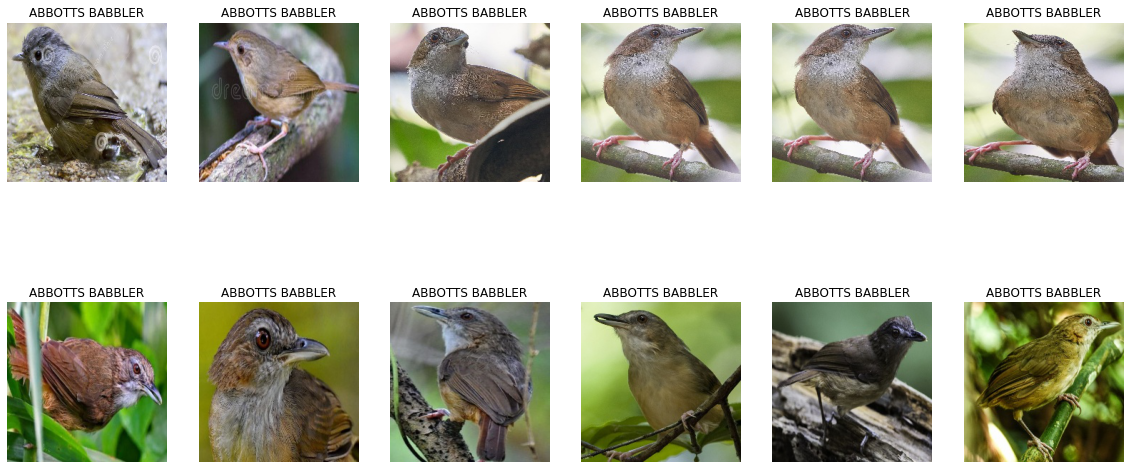

In [ ]:
plot_image(filepaths)

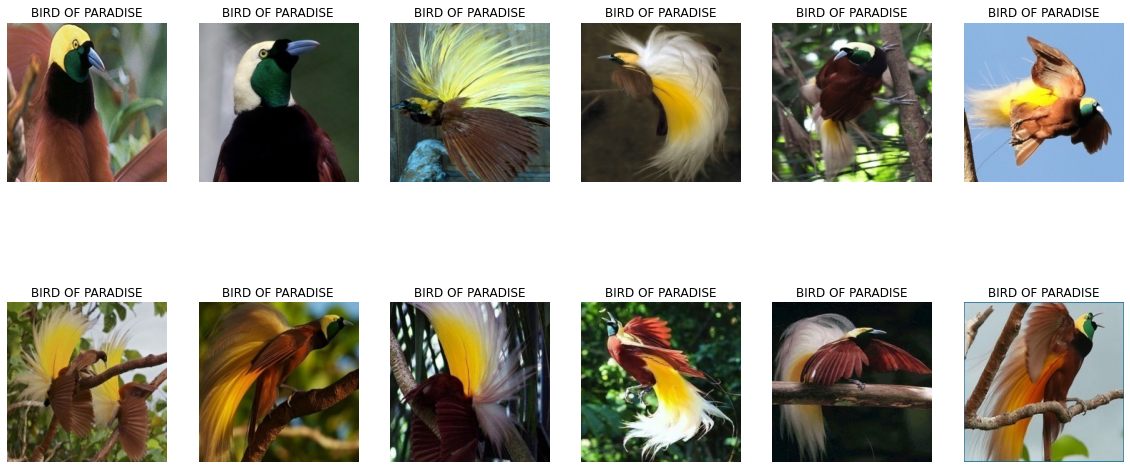

In [ ]:
plot_image(filepaths, start=8400, end=8412)

##Processing our data

In [ ]:
#Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
#create a tuple of filepaths and labels
def process_data(filepath, label):
  image = process_image(filepath)
  return (image, label)

In [ ]:
#creating data batches
BATCH_SIZE=32
def create_batch(filepaths, labels=None, test_data=False, valid_data=False):
  #Test Data
  if test_data == True:
    print("Creating test data batches......")
    dataset = tf.data.Dataset.from_tensor_slices(tf.constant(filepaths))
    data_batch = dataset.map(process_image).batch(BATCH_SIZE)

  elif valid_data == True:
    print("Creating validation data batches......")
    dataset = tf.data.Dataset.from_tensor_slices((tf.constant(filepaths),
                                                 tf.constant(labels)))
    data_batch = dataset.map(process_data).batch(BATCH_SIZE)


  else:
    print("Creating training data batches.........")
    dataset = tf.data.Dataset.from_tensor_slices((tf.constant(filepaths),
                                                tf.constant(labels)))

    dataset = dataset.shuffle(len(dataset))
    data_batch = dataset.map(process_data).batch(BATCH_SIZE)

  return data_batch

In [ ]:
training_batch = create_batch(filepaths[:100], boolean_labels[:100])
validation_batch = create_batch(filepaths[:100], boolean_labels[:100], valid_data=True)
test_batch = create_batch(filepaths[:100], boolean_labels[:100], test_data=True)

Creating training data batches.........
Creating validation data batches......
Creating test data batches......


In [ ]:
training_batch.element_spec, validation_batch.element_spec, test_batch.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 401), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 401), dtype=tf.bool, name=None)),
 TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None))

In [ ]:
#visualizing data batch
def display_batch(batch, valid_batch=False, test_batch=False):
  if test_batch == True:
    images = next(batch.as_numpy_iterator())
    plt.figure(figsize=(20,15))
    plt.suptitle("TEST BATCH", size=30)
    for i in range(len(images)):
      ax = plt.subplot(6,6, i+1)
      plt.imshow(images[i])
      plt.axis("off")

  elif valid_batch == True:
    images, labels = next(batch.as_numpy_iterator())
    plt.figure(figsize=(20,15))
    plt.suptitle("VALIDATION BATCH", size=30)
    for i in range(len(images)):
      ax = plt.subplot(6,6, i+1)
      plt.imshow(images[i])
      plt.title(birds_species[labels[i].argmax()])
      plt.axis("off")

  else:
    images, labels = next(batch.as_numpy_iterator())
    plt.figure(figsize=(20,15))
    plt.suptitle("TRAINING BATCH", size=30)
    for i in range(len(images)):
      ax = plt.subplot(6,6, i+1)
      plt.imshow(images[i])
      plt.title(birds_species[labels[i].argmax()])
      plt.axis("off")

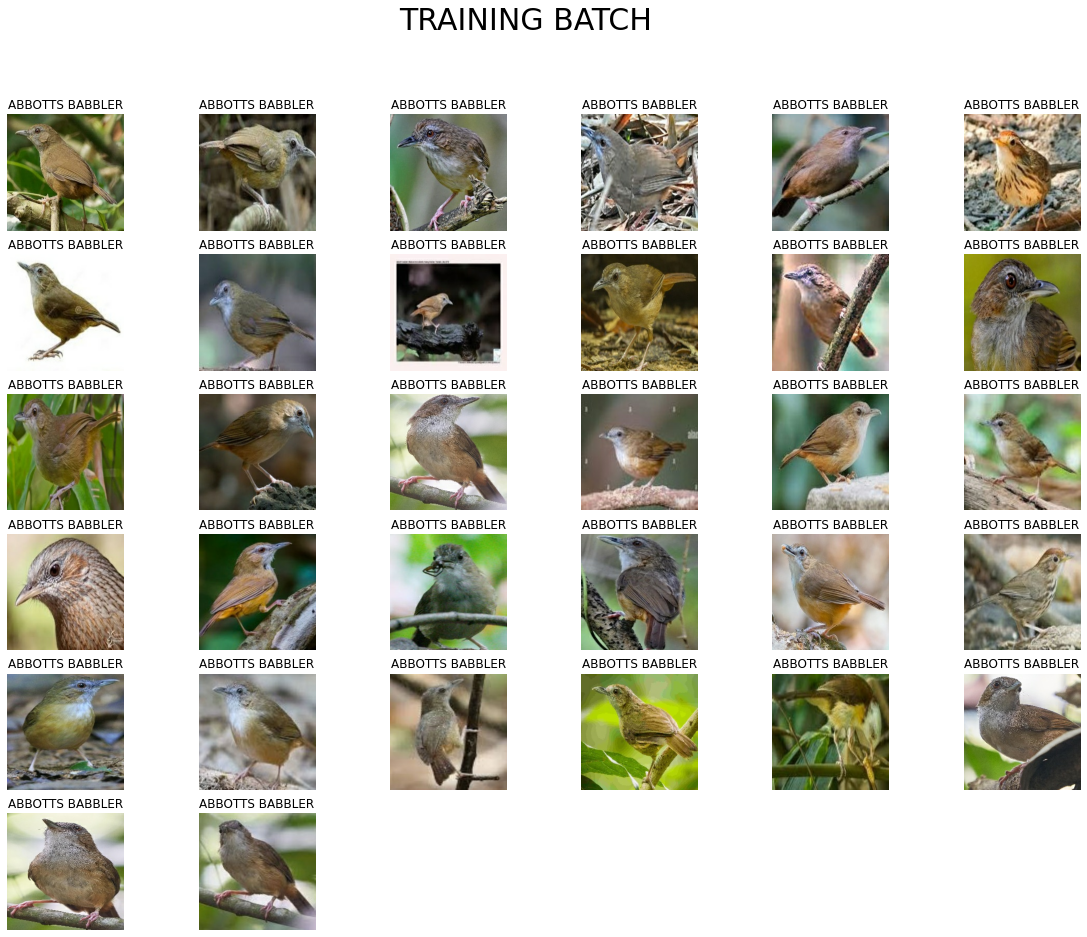

In [ ]:
display_batch(training_batch)

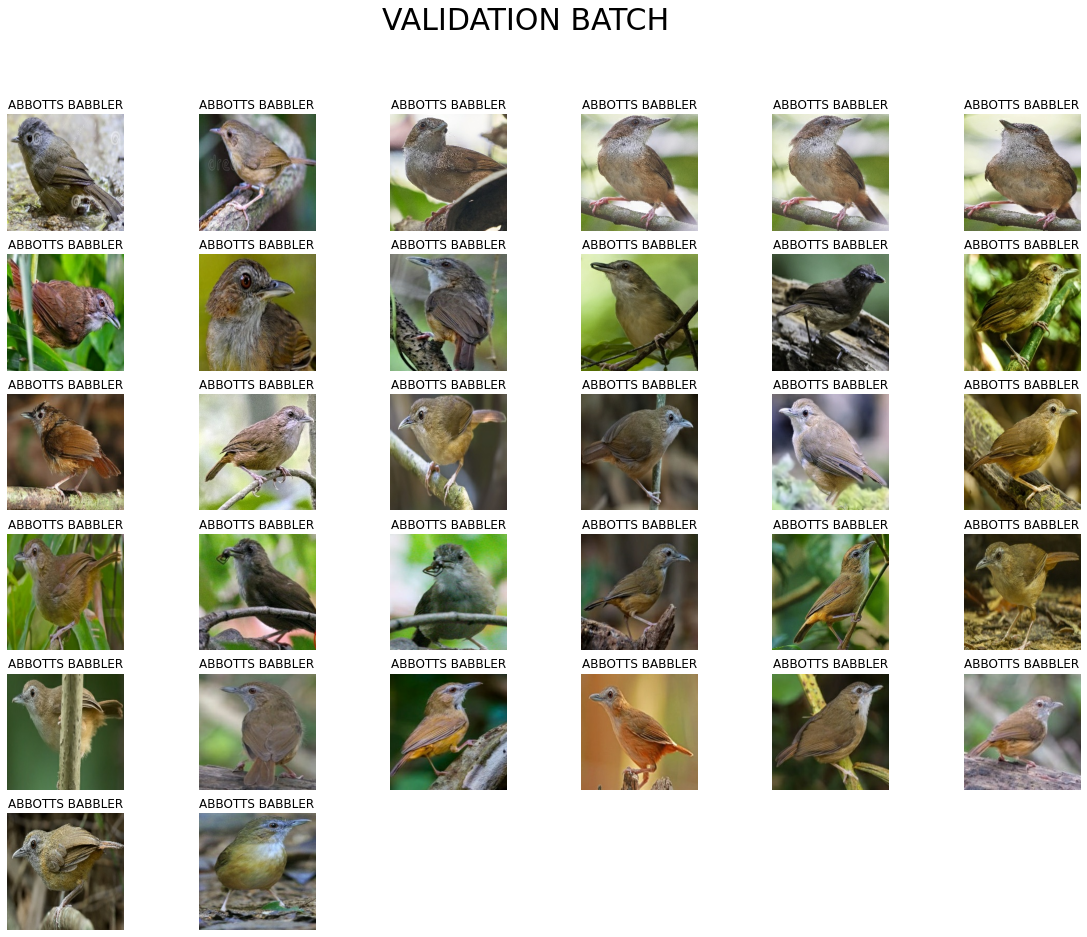

In [ ]:
display_batch(validation_batch, valid_batch=True)

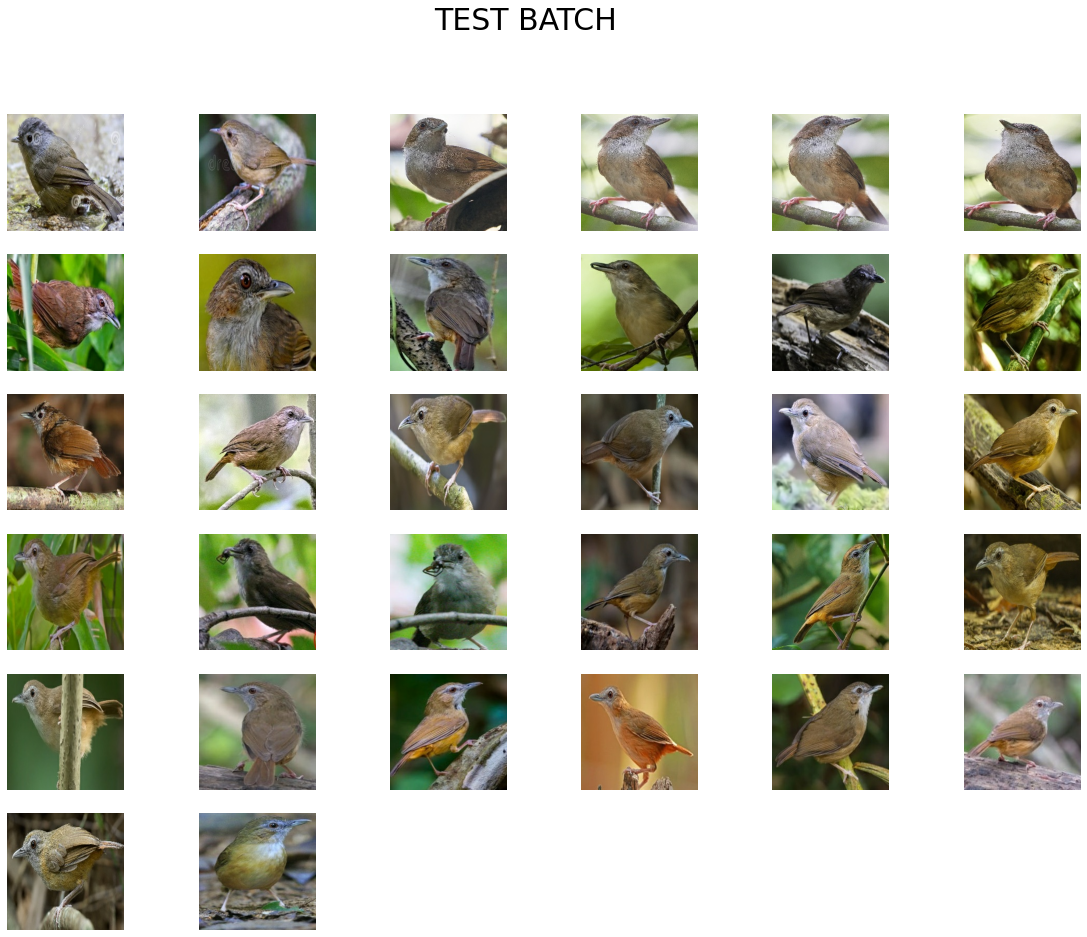

In [ ]:
display_batch(test_batch, test_batch=True)

##Creating our own splits

In [ ]:
X = filepaths[:1000]
y = boolean_labels[:1000]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
train_batch = create_batch(X_train, y_train)
valid_batch = create_batch(X_val, y_val, valid_data=True)

Creating training data batches.........
Creating validation data batches......


##Building our model

In [ ]:
INPUT_SHAPE = [None, 224, 224, 3]
OUTPUT_SHAPE = len(birds_species)
model_url = "https://tfhub.dev/tensorflow/efficientnet/b4/classification/1"

In [ ]:
def create_model():
  model = tf.keras.Sequential([
                               hub.KerasLayer(model_url),
                               tf.keras.layers.Dense(OUTPUT_SHAPE,
                                                     activation=tf.nn.softmax)
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss=tf.keras.losses.CategoricalCrossentropy(),
      metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)

  return model

In [ ]:
sample_model = create_model()
sample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              19466816  
                                                                 
 dense (Dense)               (None, 401)               401401    
                                                                 
Total params: 19,868,217
Trainable params: 401,401
Non-trainable params: 19,466,816
_________________________________________________________________


In [ ]:
#Creating Callbacks
import datetime
import os

#EarlyStopping
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                 patience=3)

#TensorBoard Callback
def create_TensorBoard():
  log_dir = "/content/drive/MyDrive/Birds Data/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")

  return tf.keras.callbacks.TensorBoard(log_dir)

In [ ]:
TensorBoard = create_TensorBoard()

In [ ]:
NUM_EPOCHS = 100 #@param {type:'slider', min:10, max:100, step:10}

In [ ]:
sample_model.fit(train_batch,
          epochs=NUM_EPOCHS,
          verbose="auto",
          callbacks = [EarlyStopping, TensorBoard],
          validation_data=valid_batch,
          validation_steps=1
          )

Epoch 1/20
25/25 [==============================] - 124s 4s/step - loss: 5.9580 - accuracy: 0.1388 - val_loss: 5.9159 - val_accuracy: 0.1562
Epoch 2/20
25/25 [==============================] - 4s 157ms/step - loss: 5.8711 - accuracy: 0.3587 - val_loss: 5.8287 - val_accuracy: 0.4062
Epoch 3/20
25/25 [==============================] - 4s 158ms/step - loss: 5.7839 - accuracy: 0.6637 - val_loss: 5.7411 - val_accuracy: 0.7188
Epoch 4/20
25/25 [==============================] - 4s 157ms/step - loss: 5.6966 - accuracy: 0.8100 - val_loss: 5.6533 - val_accuracy: 0.7812
Epoch 5/20
25/25 [==============================] - 4s 157ms/step - loss: 5.6091 - accuracy: 0.8225 - val_loss: 5.5657 - val_accuracy: 0.8125
Epoch 6/20
25/25 [==============================] - 4s 160ms/step - loss: 5.5216 - accuracy: 0.8350 - val_loss: 5.4778 - val_accuracy: 0.8125
Epoch 7/20
25/25 [==============================] - 4s 159ms/step - loss: 5.4342 - accuracy: 0.8512 - val_loss: 5.3904 - val_accuracy: 0.8125
Epoch 8

In [ ]:
def save_model(model, name="efficientnet-b4"):
  path = "/content/drive/MyDrive/Birds Data/models/" + name + ".h5"
  model.save(path)
  return path

In [ ]:
save_model(sample_model, name="sample_efficientnet-b4")

'/content/drive/MyDrive/Birds Data/models/sample_efficientnet-b4.h5'

##Training Model on 20,000 Images

In [ ]:
filepaths = filepaths[:20000]
boolean_labels = boolean_labels[:20000]

In [ ]:
TensorBoard = create_TensorBoard()
from sklearn.model_selection import train_test_split


X = filepaths
y = boolean_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

print(len(X_train),len(X_val),len(X_test))
train_batch = create_batch(X_train, y_train)
valid_batch = create_batch(X_val, y_val, valid_data=True)

11200 4800 4000
Creating training data batches.........
Creating validation data batches......


In [ ]:
model = create_model()
model.summary()

model.fit(
    train_batch,
    verbose="auto",
    epochs=NUM_EPOCHS,
    callbacks=[EarlyStopping, TensorBoard],
    validation_data=valid_batch,
    validation_steps=10
)

save_model(model, name="efficientnet-b4")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1000)              19466816  
                                                                 
 dense_5 (Dense)             (None, 401)               401401    
                                                                 
Total params: 19,868,217
Trainable params: 401,401
Non-trainable params: 19,466,816
_________________________________________________________________
Epoch 1/100
350/350 [==============================] - 111s 272ms/step - loss: 5.7350 - accuracy: 0.1259 - val_loss: 5.4902 - val_accuracy: 0.1688
Epoch 2/100
350/350 [==============================] - 55s 158ms/step - loss: 5.2874 - accuracy: 0.2115 - val_loss: 5.0995 - val_accuracy: 0.2219
Epoch 3/100
350/350 [==============================] - 56s 158ms/step - loss: 4.9429 - accuracy: 0.2452 - val_loss: 4.7946 - val_accuracy: 

'/content/drive/MyDrive/Birds Data/models/efficientnet-b4.h5'

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model


In [ ]:
model = load_model("/content/drive/MyDrive/Birds Data/models/efficientnet-b4.h5")

Loading saved model from: /content/drive/MyDrive/Birds Data/models/efficientnet-b4.h5


##Visualizing our predictions

In [ ]:
predictions = model.predict(valid_batch)
predictions

array([[1.19866589e-10, 7.38208837e-06, 7.78281748e-01, ...,
        8.13658307e-10, 8.57711124e-10, 8.65883698e-10],
       [6.33685440e-02, 8.58575106e-07, 4.41516583e-08, ...,
        3.92439681e-09, 3.76417031e-09, 3.88350241e-09],
       [2.12110449e-02, 4.96954541e-04, 1.65925347e-04, ...,
        2.28657129e-08, 2.30366588e-08, 2.31408741e-08],
       ...,
       [1.22917695e-02, 2.84872979e-08, 1.57618907e-09, ...,
        5.42971612e-10, 5.09850884e-10, 5.29592092e-10],
       [3.00757755e-02, 3.65022715e-04, 6.75396732e-05, ...,
        3.03506944e-08, 3.08854418e-08, 3.02488345e-08],
       [4.63604488e-09, 3.57135862e-01, 2.25829268e-07, ...,
        1.77192039e-09, 1.81529014e-09, 1.78195581e-09]], dtype=float32)

In [ ]:
birds_species[predictions[0].argmax()]

'AFRICAN CROWNED CRANE'

In [ ]:
#Unbatch the validation data
def unbatch_data(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(label)

  return images, labels

In [ ]:
val_images, val_labels = unbatch_data(valid_batch)

In [ ]:
len(val_images), len(val_labels)

(200, 200)

In [ ]:
birds_species[val_labels[0].argmax()]

'AFRICAN CROWNED CRANE'

In [ ]:
def plot_pred(prediction_probabilities, labels, images, index=1):
  plt.imshow(images[index])
  plt.xticks([])
  plt.yticks([])

  if labels[index].argmax() == prediction_probabilities[index].argmax():
    color="green"
  else:
    color="red"

  plt.title("{}  {:.2f}%  {}".format(birds_species[labels[index].argmax()],
                                    prediction_probabilities[index].max() * 100,
                                    birds_species[prediction_probabilities[index].argmax()]),
            color=color)

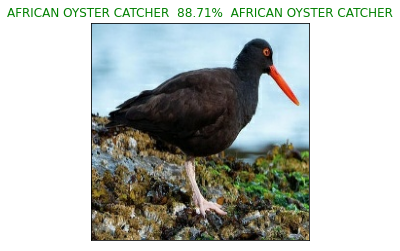

In [ ]:
plot_pred(predictions, val_labels, val_images, 11)

In [ ]:
def plot_top_preds(prediction_probabilities, labels, images, index=1):

  top_preds = prediction_probabilities[index].argsort()[-10:][::-1]

  top_plot = plt.bar(np.arange(len(top_preds)),
            prediction_probabilities[index][top_preds],
            color="grey")

  plt.xticks(np.arange(len(top_preds)),
                       birds_species[top_preds],
             rotation="vertical")

  true_label = birds_species[labels[index].argmax()]
  top_pred_labels = birds_species[top_preds]

  if np.isin(true_label, top_pred_labels):
    top_plot[np.argmax(top_pred_labels == true_label)].set_color("green")
  else:
    pass

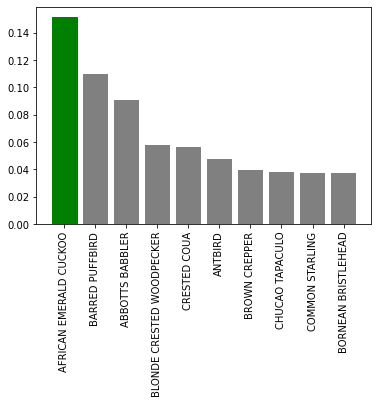

In [ ]:
plot_top_preds(predictions, val_labels, val_images, 19)

In [ ]:
def plot_pred_batch(prediction_probabilities, labels, images, index=1):
  plt.figure(figsize=(40,20))

  i_start = index
  num_images=20
  num_rows = 5
  num_cols = 4

  for i in range(num_images):
    plt.subplot(num_rows, num_cols*2, 2*i+1)
    plot_pred(prediction_probabilities, labels, images, i_start+i)

    plt.subplot(num_rows, num_cols*2, 2*i+2)
    plot_top_preds(prediction_probabilities, labels, images, i_start+i)

  plt.show()

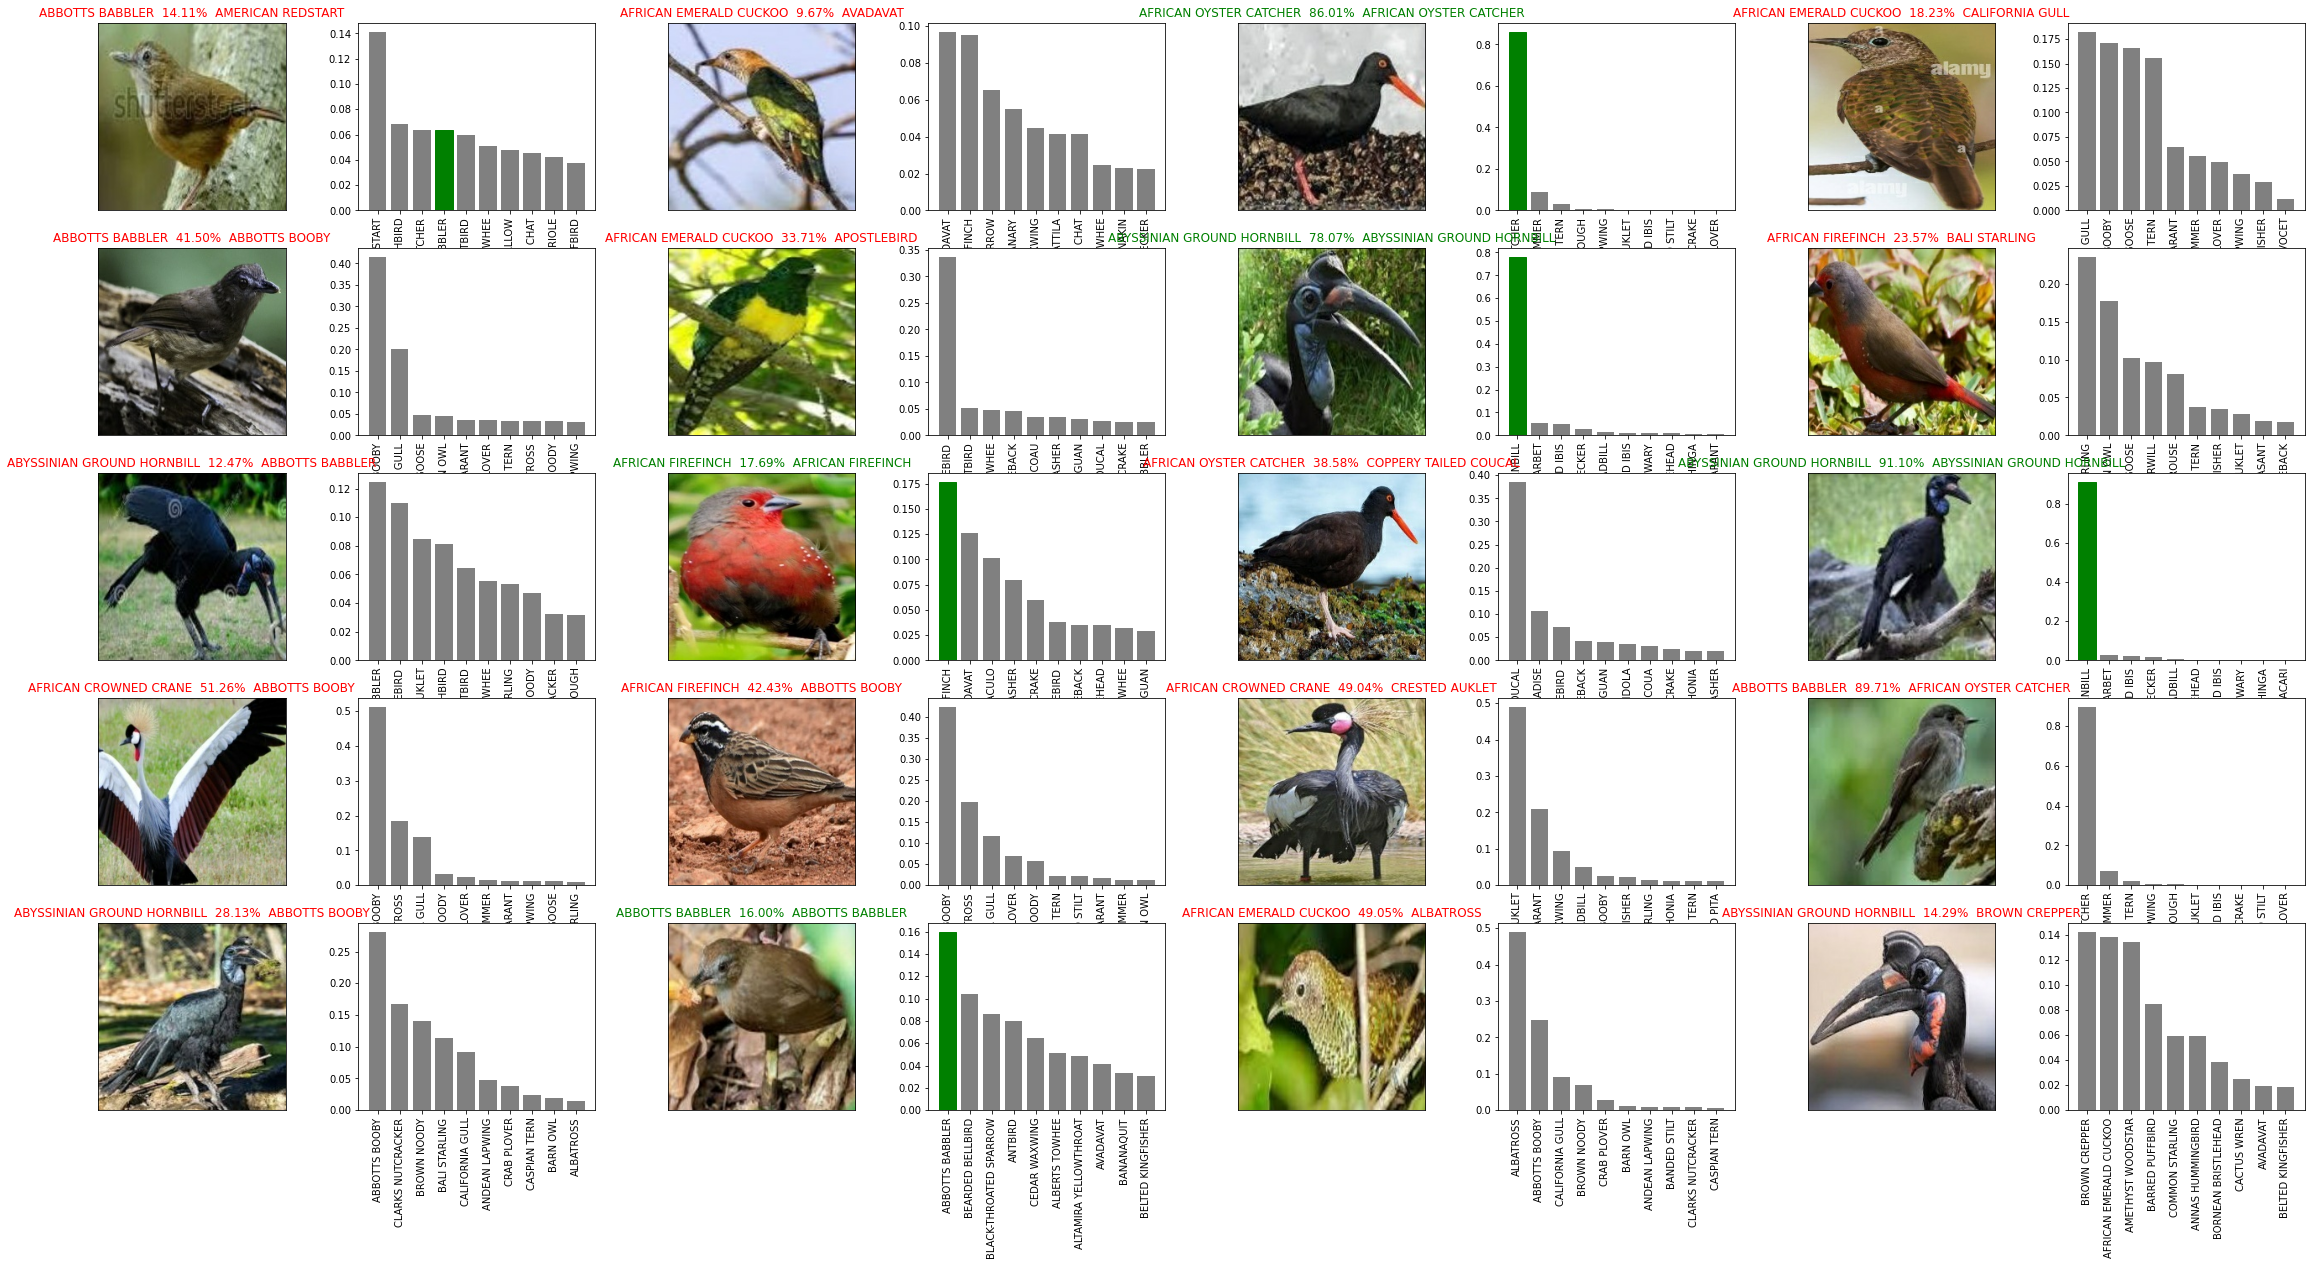

In [ ]:
plot_pred_batch(predictions, val_labels, val_images, 1)